# Exercises and Homework for week 8

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Oliver But, Thomas Erben & Matthias Schott 

Homework is due on **Wednesday, 04/06/2022, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_6_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * Fast Fourier Transform

**Your group number here please:**  Group 1_3


# 1. Lecture Review (0 points)

If you did the lecture review questions [04_Lecture_Review.ipynb](04_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

# 2. Some Basic Consideration (6 points)

In this exercise, you will: Generate a signal composed of a low-frequency sine wave, a high-frequency sine wave (4 times the amplitude of the low frequency),  medium-frequency cosine wave with an amplitude between the other two. Then you will visualize the signal in the time domain and compute and visualize the FFT of the signal (Analyze the real part, imaginary part, magnitude, and phase of the FFT). This is followed by an investigation of the effect of sampling size by doubling and then increasing it tenfold. In the last step, you will need to apply a low-pass filter to the FFT and reconstruct the filtered signal using the inverse FFT. Lets go step by step:

**Sub-Task 1: Generating the Signal**
- Define the sampling rate (fs) and duration.
- Generate a time vector t.
- Create:
    - A low-frequency sine wave (e.g., 5 Hz, amplitude 1),
    - A high-frequency sine wave (20 Hz, amplitude 0.5),
    - A medium-frequency cosine wave (10 Hz, amplitude 0.75).
    - Combine them into one signal.
- Plot the generated signal vs. time.

**Sub-Task 2: FFT Analysis**
- Compute the FFT of the signal.
- Compute the frequency bins.
- Plot:
    - Real part vs. frequency.
    - Imaginary part vs. frequency.
    - Magnitude spectrum (absolute value).
    - Phase spectrum (angle).
    - Interpret what you see as comments in your code
- Repeat the analysis with double and ten times the original sampling size.
    - Discuss what changes in the spectra you see

**Sub-Task 3: Low-Pass Filter**
- Create a simple low-pass filter (e.g., zero out frequency components above a threshold of 12 Hz).
- Apply it to the FFT.
- Perform an inverse FFT to reconstruct the filtered signal.
- Plot the filtered signal vs. time.

In [110]:
import numpy as np
import matplotlib.pyplot as plt # For plotting
import pandas as pd # For loading and handling data
# all plots should appear directly within the notebook
%matplotlib inline

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")

(-0.1, 1.3)

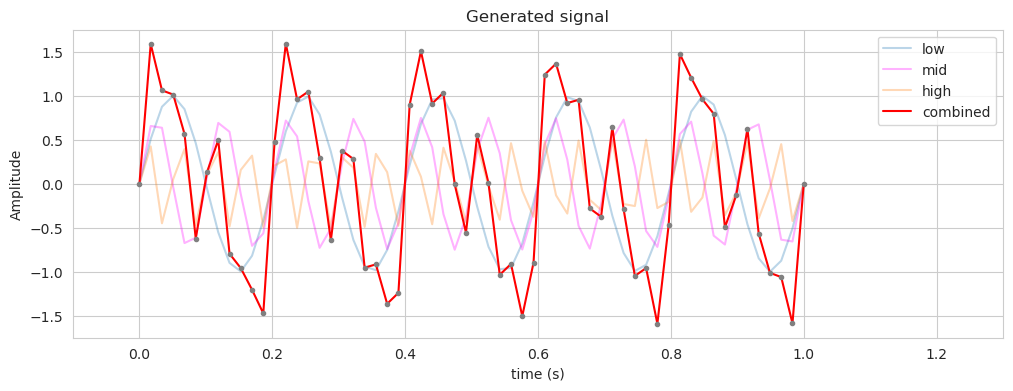

In [111]:
#Task 1
duration = 1 #duration of the signal in seconds

fs = 3*20 #the minimun sampling rate at least the double of the max frequency to sample (2*20Hz), 
            #we sampled at least 3 times the maximum frequency
    
t1 = np.linspace(0,duration, fs*duration) #time vector 

low_sin = np.sin(2*np.pi*5*t1) #low frequency
high_sin = 0.5*np.sin(2*np.pi*20*t1) #high frequency
mid_sin = 0.75*np.sin(2*np.pi*10*t1) #medium frequency

signal1 = low_sin + high_sin + mid_sin  #Combined signal

#Plot
plt.figure(figsize=(12,4))
plt.plot(t1,low_sin, label = "low", alpha=0.3)
plt.plot(t1,mid_sin, label = "mid", alpha=0.3, color = "magenta")
plt.plot(t1,high_sin, label = "high", alpha=0.3)
plt.plot(t1,signal1, label = "combined", color = "r")
plt.plot(t1, signal1,'.', color = "gray")
plt.legend()
plt.xlabel("time (s)");plt.ylabel("Amplitude");plt.title('Generated signal');plt.xlim(-0.1,1.3)

Text(0.5, 1.0, 'Phase spectrum')

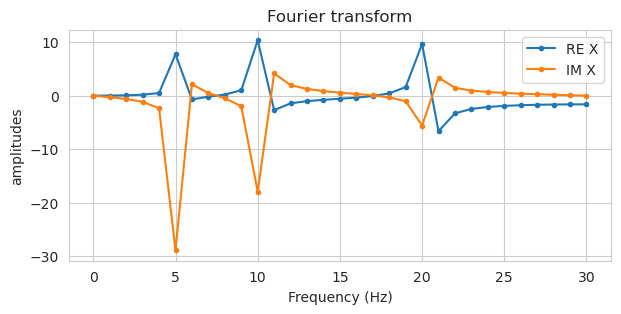

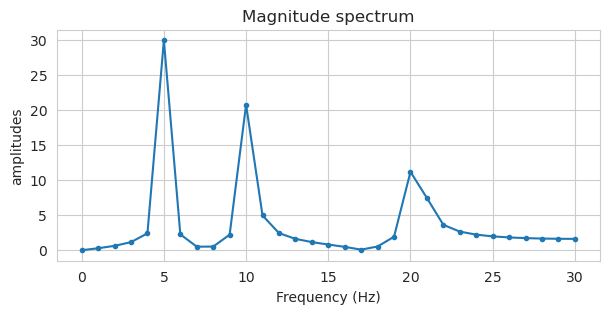

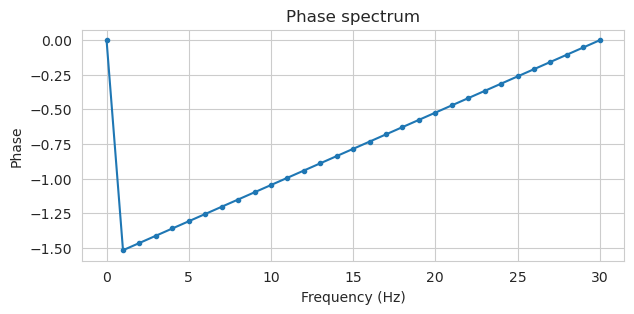

In [112]:
# Task 2
#We computed the FFT using the numpy module FFT
ft1 = np.fft.rfft(signal1)

#Frequency bins (extracted directly from fft)
frequencies1 = np.fft.rfftfreq(len(signal1), d=1/fs)

#Here we use the plot templates from lecture note
plt.figure(figsize =(7,3))
plt.plot(frequencies1,np.real(ft1),'.-', label='RE X')
plt.plot(frequencies1,np.imag(ft1),'.-', label='IM X')
plt.xlabel('Frequency (Hz)');plt.ylabel('amplitudes');plt.title('Fourier transform')
plt.legend()

plt.figure(figsize =(7,3))
plt.plot(frequencies1,np.abs(ft1),'.-')
plt.xlabel('Frequency (Hz)');plt.ylabel('amplitudes');plt.title('Magnitude spectrum')

plt.figure(figsize =(7,3))
plt.plot(frequencies1,np.arctan(np.imag(ft1)/(np.real(ft1)+1e-10)),'.-')
plt.xlabel('Frequency (Hz)');plt.ylabel('Phase');plt.title('Phase spectrum')


#Interpretation: We can clearly identify the 3 frequencies of our combine signal
# 5, 10 and 20 Hz. 

Text(0.5, 1.0, 'Phase spectrum 10 x sampling size')

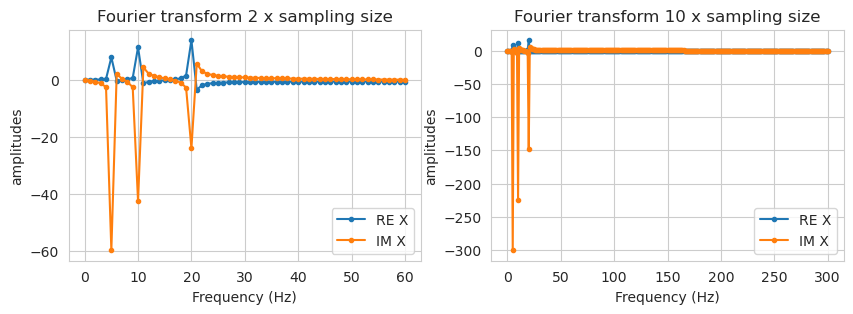

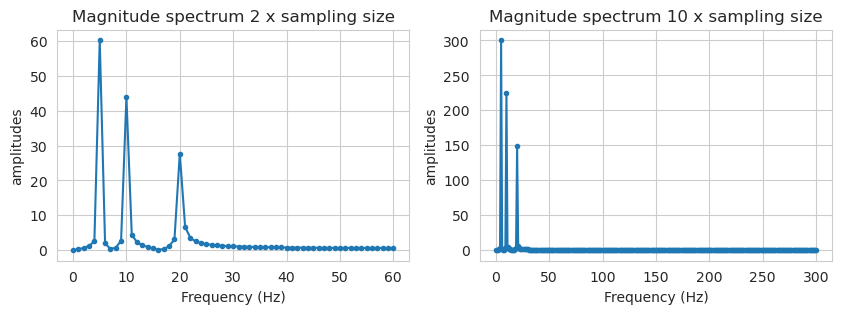

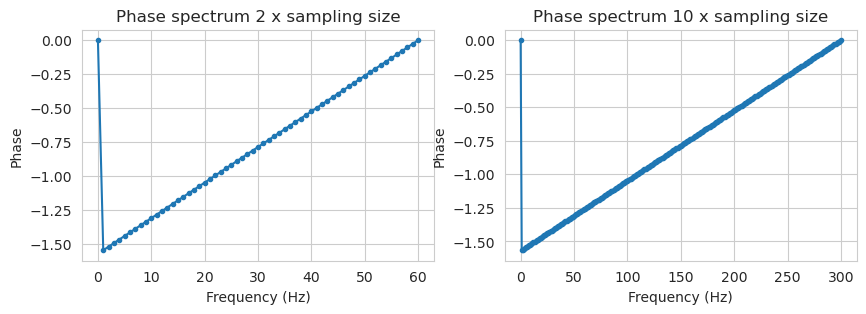

In [113]:
#2x data points
t = np.linspace(0,duration, 2*fs*duration) #time vector 

low_sin = np.sin(2*np.pi*5*t) #low frequency
high_sin = 0.5*np.sin(2*np.pi*20*t) #high frequency
mid_sin = 0.75*np.sin(2*np.pi*10*t) #medium frequency

signal2 = low_sin + high_sin + mid_sin  #Combined signal
ft2 = np.fft.rfft(signal2)
frequencies2 = np.fft.rfftfreq(len(signal2), d=1/(2*fs))

#10x data points
t = np.linspace(0,duration, 10*fs*duration) #time vector 

low_sin = np.sin(2*np.pi*5*t) #low frequency
high_sin = 0.5*np.sin(2*np.pi*20*t) #high frequency
mid_sin = 0.75*np.sin(2*np.pi*10*t) #medium frequency

signal10 = low_sin + high_sin + mid_sin  #Combined signal
ft10 = np.fft.rfft(signal10)
frequencies10 = np.fft.rfftfreq(len(signal10), d=1/(10*fs))

#Components
plt.figure(figsize=(10,3))

axs = [plt.subplot2grid((1,2),(0,0)), plt.subplot2grid((1,2),(0,1))]
l, = axs[0].plot(frequencies2,np.real(ft2),'.-', label='RE X')
axs[0].plot(frequencies2,np.imag(ft2),'.-', label='IM X')  
axs[0].set_xlabel('Frequency (Hz)');axs[0].set_ylabel('amplitudes')
axs[0].set_title('Fourier transform 2 x sampling size')
axs[0].legend()

l, = axs[1].plot(frequencies10,np.real(ft10),'.-', label='RE X')
axs[1].plot(frequencies10,np.imag(ft10),'.-', label='IM X')
axs[1].set_xlabel('Frequency (Hz)');axs[1].set_ylabel('amplitudes')
axs[1].set_title('Fourier transform 10 x sampling size')
axs[1].legend()

plt.figure(figsize=(10,3))
axs = [plt.subplot2grid((1,2),(0,0)), plt.subplot2grid((1,2),(0,1))]
l, = axs[0].plot(frequencies2,np.abs(ft2),'.-')
axs[0].set_xlabel('Frequency (Hz)');axs[0].set_ylabel('amplitudes')
axs[0].set_title('Magnitude spectrum 2 x sampling size')

l, = axs[1].plot(frequencies10,np.abs(ft10),'.-')
axs[1].set_xlabel('Frequency (Hz)');axs[1].set_ylabel('amplitudes')
axs[1].set_title('Magnitude spectrum 10 x sampling size')

plt.figure(figsize=(10,3))
axs = [plt.subplot2grid((1,2),(0,0)), plt.subplot2grid((1,2),(0,1))]
l, = axs[0].plot(frequencies2,np.arctan(np.imag(ft2)/(np.real(ft2)+1e-10)),'.-')
axs[0].set_xlabel('Frequency (Hz)');axs[0].set_ylabel('Phase')
axs[0].set_title('Phase spectrum 2 x sampling size')

l, = axs[1].plot(frequencies10,np.arctan(np.imag(ft10)/(np.real(ft10)+1e-10)),'.-')
axs[1].set_xlabel('Frequency (Hz)');axs[1].set_ylabel('Phase')
axs[1].set_title('Phase spectrum 10 x sampling size')

#Interpretation: If we increase the number of data points but keeping constant the duration
# we can measure higher frequencies. The value of the amplitude at each frequency in the magnitude 
# and phase spectrum changed because of the normalization for each sampling. Both spectrum kept constant
# its main features, as it is expected since the signal remains as the original. 

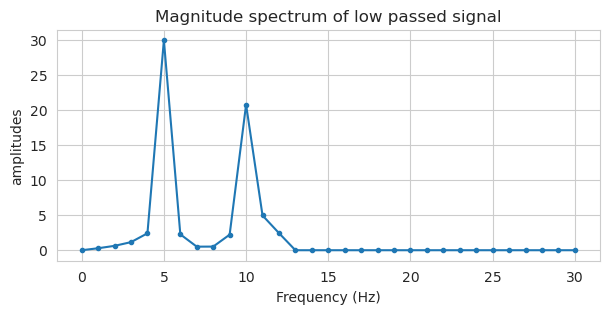

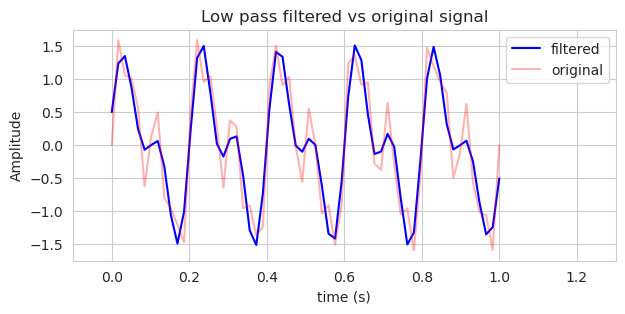

In [117]:
#Task 3
#In the simplest case, we can create a filter by masking the frequency array
t1 = np.linspace(0,duration, fs*duration) #time vector (we increase to observe better the features)

low_pass = np.where(frequencies1 > 12, 0, 1) # filtering above 12 Hz with np.where()

filtered_signal = np.fft.irfft(ft1*low_pass, n = len(t1)) #Convolution and we force the size to be len(t1).

plt.figure(figsize =(7,3))
plt.plot(frequencies1,np.abs(ft1*low_pass),'.-')
plt.xlabel('Frequency (Hz)');plt.ylabel('amplitudes');plt.title('Magnitude spectrum of low passed signal')

#Plot
plt.figure(figsize =(7,3))
plt.plot(t1, filtered_signal, label = "filtered", color = "b")
plt.plot(t1, signal1, label = "original", color = "r", alpha = 0.3)
plt.xlabel("time (s)");plt.ylabel("Amplitude");plt.title('Low pass filtered vs original signal')
plt.xlim(-0.1,1.3)
plt.legend()

#Interpretation: We can see that indeed the filter zero out the 20Hz peak in the 
# magnitude spectrum. From the filtered signal que can identify that the features 
# of small amplitude, corresponding to the original 20 Hz has been smoothen out.
# Only the features of the high amplitude (low frequency) components dominate. 

## 3. Moon-Landing (7 points)

In this exercise, you will implement image denoising using the 2D Fast Fourier Transform (FFT). You will load a grayscale image, analyze its frequency spectrum, apply a frequency-based filter to remove high-frequency noise, and reconstruct the denoised image.

Your task is to start by loading the image moonlanding.png using plt.imread(). Convert the image to a floating-point array and extract the first channel if the image has multiple color channels, to ensure the data is two-dimensional. Display the shape of the image to confirm it.

<img src="data/moonlanding.png" style="width: 500px;" style="height: 250px;">


Next, compute the 2D Fourier Transform of the image using np.fft.fft2(). Store the result in a variable F, which represents the frequency spectrum of the image. To visualize this spectrum, write a function plot_spectrum(F) that computes the magnitude of F, scales it for better display, and clips values above a certain threshold. Use plt.imshow() to display the scaled magnitude spectrum.

Make a copy of F named ff. You will apply a simple frequency filter by zeroing out high-frequency components, by zeroing out rows and columns. You need to play around which rows and columns to be zeroed out to achieve an optimal result, i.e. a image where the high-frequency components are removed from the spectrum.

Reconstruct the denoised image by applying the inverse FFT using np.fft.ifft2(ff), and extract the real part of the result. Store the reconstructed image as im_new.

Finally, display the original image, the original Fourier spectrum, the filtered spectrum, and the reconstructed denoised image using plt.imshow() in a subplot grid.

In [115]:
# Your solution here please

## 4. Audio Analysis and Processing (7 points)

We just received an audio recording from famous composer Kevin MacLeod, but it seems like the recording contains some unwanted high frequency noise! So in this exercise, we are going to analyse the frequency spectrum of a waveform and remove the noisy component using the Fourier transform. To test our techniques, we will showcase the procedure for a simpler test file first.

In [116]:
from IPython.display import Audio
Audio("data/sneaky_snitch_noisy.wav")

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [ ]:
Audio("data/simple.wav")

The steps are:
1. Load the audio file `data/simple.wav' and plot the waveform and the frequency spectrum using Fourier transformations. 
2. Identify the dominating frequencies and the region of noise. Then remove the unwanted noise in the frequency domain.
3. Transform the sample back into the time domain and save the file as an `.wav`. Describe the effect of your filtering scheme on the resulting sound.
4. Repeat steps 1 to 3 with `data/sneaky_snitch_noisy.wav` to get a file `sneaky_snitch_denoised.wav`.

Hints:
- You can use the `pydub` library to load the `.wav` files
- You can use `scipy.io.wavfile` to write `.wav` files

In [ ]:
# Your solution here please